In [3]:
from __future__ import print_function
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [8]:
#image_id = 'M2kh294N9c72sICO990Uew'
with open('config.json') as config_file:
    config = json.load(config_file)
# in this example we are only interested in the labels
labels = config['labels']

# print labels
print("There are {} labels in the config file".format(len(labels)))
labels_dict = {}
for label_id, label in enumerate(labels):
    labels_dict[label["name"]] = label["color"]
labels_dict

There are 66 labels in the config file


{'animal--bird': [165, 42, 42],
 'animal--ground-animal': [0, 192, 0],
 'construction--barrier--curb': [196, 196, 196],
 'construction--barrier--fence': [190, 153, 153],
 'construction--barrier--guard-rail': [180, 165, 180],
 'construction--barrier--other-barrier': [90, 120, 150],
 'construction--barrier--wall': [102, 102, 156],
 'construction--flat--bike-lane': [128, 64, 255],
 'construction--flat--crosswalk-plain': [140, 140, 200],
 'construction--flat--curb-cut': [170, 170, 170],
 'construction--flat--parking': [250, 170, 160],
 'construction--flat--pedestrian-area': [96, 96, 96],
 'construction--flat--rail-track': [230, 150, 140],
 'construction--flat--road': [128, 64, 128],
 'construction--flat--service-lane': [110, 110, 110],
 'construction--flat--sidewalk': [244, 35, 232],
 'construction--structure--bridge': [150, 100, 100],
 'construction--structure--building': [70, 70, 70],
 'construction--structure--tunnel': [150, 120, 90],
 'human--person': [220, 20, 60],
 'human--rider--bic

In [130]:
def apply_color_map(image_array, labels):
    color_array = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)

    for label_id, label in enumerate(labels):
        # set all pixels with the current label to the color of the current label
        color_array[image_array == label_id] = label["color"]

    return color_array

In [10]:
image_path = "/Users/michalgolovanevsky/SeniorProject/{}.jpg".format(image_id)
label_path = "/Users/michalgolovanevsky/SeniorProject/{}.png".format(image_id)
instance_path = "/Users/michalgolovanevsky/SeniorProject/{}.png".format(image_id)
panoptic_path = "/Users/michalgolovanevsky/SeniorProject/{}.png".format(image_id)

In [127]:
# load images
base_image = Image.open(image_path)
label_image = Image.open(label_path)
instance_image = Image.open(instance_path)
panoptic_image = Image.open(panoptic_path)

In [131]:
# convert labeled data to numpy arrays for better handling
label_array = np.array(label_image)
instance_array = np.array(instance_image, dtype=np.uint16)

# now we split the instance_array into labels and instance ids
instance_label_array = np.array(instance_array / 256, dtype=np.uint8)
instance_ids_array = np.array(instance_array % 256, dtype=np.uint8)

# for visualization, we apply the colors stored in the config
colored_label_array = apply_color_map(label_array, labels)
#colored_instance_label_array = apply_color_map(instance_label_array, labels)

[{'color': [165, 42, 42],
  'instances': True,
  'readable': 'Bird',
  'name': 'animal--bird',
  'evaluate': True},
 {'color': [0, 192, 0],
  'instances': True,
  'readable': 'Ground Animal',
  'name': 'animal--ground-animal',
  'evaluate': True},
 {'color': [196, 196, 196],
  'instances': False,
  'readable': 'Curb',
  'name': 'construction--barrier--curb',
  'evaluate': True},
 {'color': [190, 153, 153],
  'instances': False,
  'readable': 'Fence',
  'name': 'construction--barrier--fence',
  'evaluate': True},
 {'color': [180, 165, 180],
  'instances': False,
  'readable': 'Guard Rail',
  'name': 'construction--barrier--guard-rail',
  'evaluate': True},
 {'color': [90, 120, 150],
  'instances': False,
  'readable': 'Barrier',
  'name': 'construction--barrier--other-barrier',
  'evaluate': True},
 {'color': [102, 102, 156],
  'instances': False,
  'readable': 'Wall',
  'name': 'construction--barrier--wall',
  'evaluate': True},
 {'color': [128, 64, 255],
  'instances': False,
  'reada

In [107]:
colors = []
for i in range(colored_label_array.shape[0]):
    array = np.unique(colored_label_array[i], axis = 0)
    if list(array[0]) not in colors:
        colors.append(list(array[0]))
colors

[[70, 130, 180],
 [70, 70, 70],
 [0, 0, 0],
 [0, 0, 142],
 [0, 0, 70],
 [128, 64, 128],
 [120, 10, 10]]

In [122]:
items_in_photo = {}
for item in labels_dict:
    color = labels_dict[item]
    if color in colors:
        items_in_photo[item] = 1
    else:
        items_in_photo[item] = 0

In [123]:
items_in_photo

{'animal--bird': 0,
 'animal--ground-animal': 0,
 'construction--barrier--curb': 0,
 'construction--barrier--fence': 0,
 'construction--barrier--guard-rail': 0,
 'construction--barrier--other-barrier': 0,
 'construction--barrier--wall': 0,
 'construction--flat--bike-lane': 0,
 'construction--flat--crosswalk-plain': 0,
 'construction--flat--curb-cut': 0,
 'construction--flat--parking': 0,
 'construction--flat--pedestrian-area': 0,
 'construction--flat--rail-track': 0,
 'construction--flat--road': 1,
 'construction--flat--service-lane': 0,
 'construction--flat--sidewalk': 0,
 'construction--structure--bridge': 0,
 'construction--structure--building': 1,
 'construction--structure--tunnel': 0,
 'human--person': 0,
 'human--rider--bicyclist': 0,
 'human--rider--motorcyclist': 0,
 'human--rider--other-rider': 0,
 'marking--crosswalk-zebra': 0,
 'marking--general': 0,
 'nature--mountain': 0,
 'nature--sand': 0,
 'nature--sky': 1,
 'nature--snow': 0,
 'nature--terrain': 0,
 'nature--vegetation

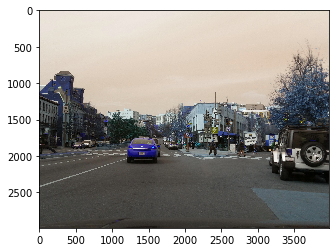

In [121]:
import cv2
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()

In [124]:
items_in_photo = []
for item in labels_dict:
    color = labels_dict[item]
    if color in colors:
        items_in_photo.append(1)
    else:
        items_in_photo.append(0)